# Sendy Logistics Challenge Regression Model¶


## Introduction 

#### About Sendy:

Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa.



#### Objective:

To build an accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers.

This notebook aims to help Sendy predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. This will enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling

## About the Data

The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform.
The training dataset is a subset of over 20,000 orders.


Variables include:

Order details, 
Placement times, 
Confirmation times, 
Arrival at Pickup times, 
Pickup times, 
Arrival at Destination times,  
Rider metrics.

## Importing the Libraries

In [89]:
# 
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
from plotnine import *

%matplotlib inline

## Getting the Data

In [67]:
# the csv files are converted to panda dataframe and are renamed.
#Train_df= pd.read_csv("Train.csv")
#Test_df= pd.read_csv("Test.csv")
#Riders_df= pd.read_csv("Riders.csv")
#VariableDefinitions_df= pd.read_csv("VariableDefinitions.csv")
#SampleSubmission_df= pd.read_csv("SampleSubmission.csv")


#files from local repo
Train_df = pd.read_csv(r"C:\Users\27833\Downloads\Train.csv")

# Data Exploration/Analysis

## Overview of the Data

In [14]:
Train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [27]:
Train_df.columns.values

array(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
       'Pickup - Time', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'], dtype=object)

In [15]:
Train_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


from the above, it is observable that distance from pickup to drop off location is from 1km to 49km and that on average the Time from Pickup to Arrival is ranging from 1sec 7883 seconds.

In [3]:
#Train data set
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

The training-set has 21201 examples and 28 features + the target variable (Time from Pickup to Arrival). 6 of the features are floats, 13 are integers and 10 are objects. 

From the table above,few things can be noted. some of the features need to be converted into numeric ones, so that the machine learning algorithms can process them. Furthermore. Some more features, that contain missing values (NaN = not a number) can also be spoted, that should be deal with

## A closer look at the missing values:

In [16]:
tr_total = Train_df.isnull().sum().sort_values(ascending=False)
tr_percent_1 = Train_df.isnull().sum()/Train_df.isnull().count()*100
tr_percent_2 = (round(tr_percent_1, 1)).sort_values(ascending=False)
tr_missing_data = pd.concat([tr_total, tr_percent_2], axis=1, keys=['Total', '%'])
tr_missing_data.head(5)

,Total,%
Precipitation in millimeters,20649,97.4
Temperature,4366,20.6
Time from Pickup to Arrival,0,0.0
Arrival at Pickup - Weekday (Mo = 1),0,0.0
User Id,0,0.0


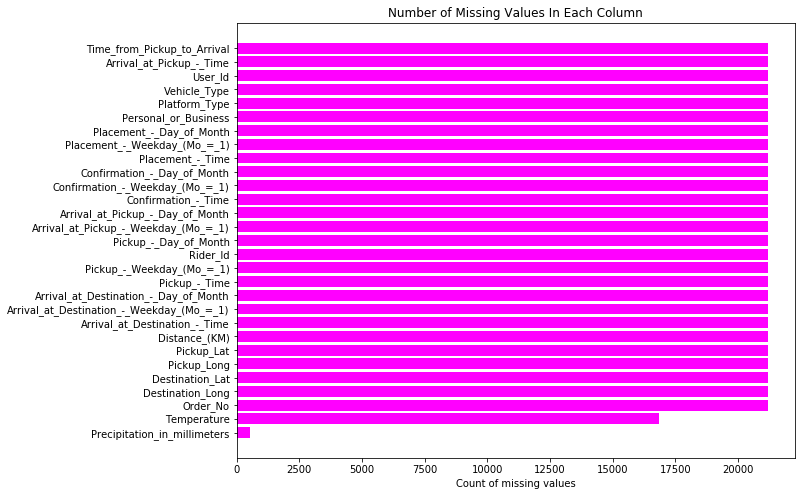

In [56]:
missing_df = Train_df.notnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.barh(ind, missing_df.missing_count.values, color='magenta')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of Missing Values In Each Column")
plt.show()

It will be a bit tricky to deal with the 'Temparature' feature, which has 4366 missing values. The 'Precipitation in mm' feature needs further investigation, but it looks like it would be better if it is dropped off from the dataset, since 97.4 % of it are missing.

## A first look at the behaviour of delivery time (Y - Variable)

In [78]:
Train_df.columns = [col.replace(" ","_") for col in Train_df.columns]

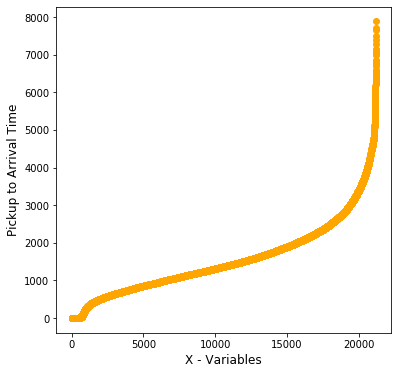

In [80]:
plt.figure(figsize=(6,6))
plt.scatter(range(Train_df.shape[0]), np.sort(Train_df.Time_from_Pickup_to_Arrival.values), color = 'orange')
plt.xlabel('X - Variables', fontsize=12)
plt.ylabel('Pickup to Arrival Time', fontsize=12)
plt.show()

## Analysing And Adding The Riders Data

## Understanding The Distribution Of The Data

## Correlation Within The Dataset

In [69]:
corr_matrix = Train_df.corr()

In [103]:
df_dummy = pd.get_dummies(Train_df)
df = pd.concat([Train_df, df_dummy], axis = 1)

MemoryError: Unable to allocate 429. MiB for an array with shape (21201, 21201) and data type uint8

In [75]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

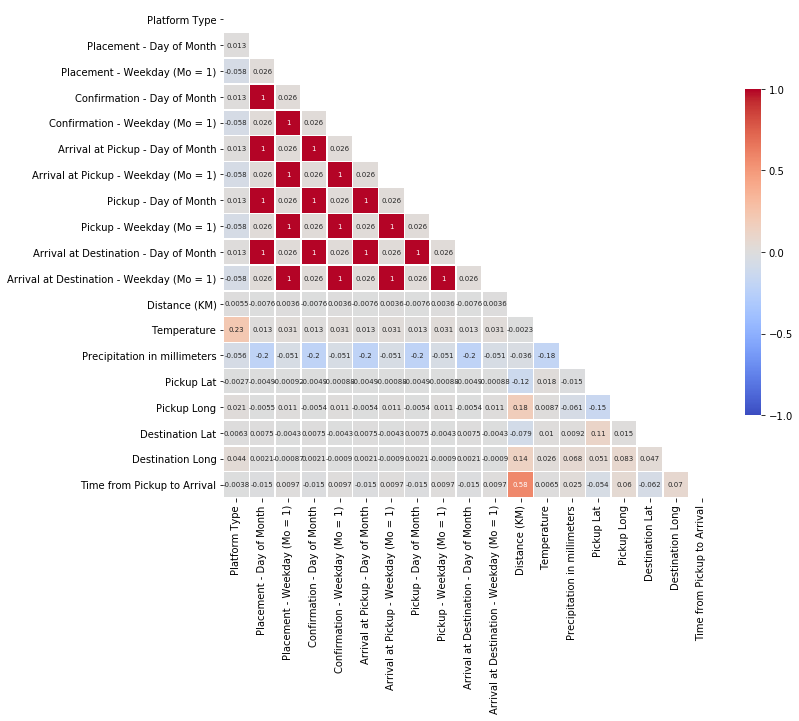

In [76]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 7})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Dropping Columns

## Relationships between X-Variables

### Geography And Coordinates

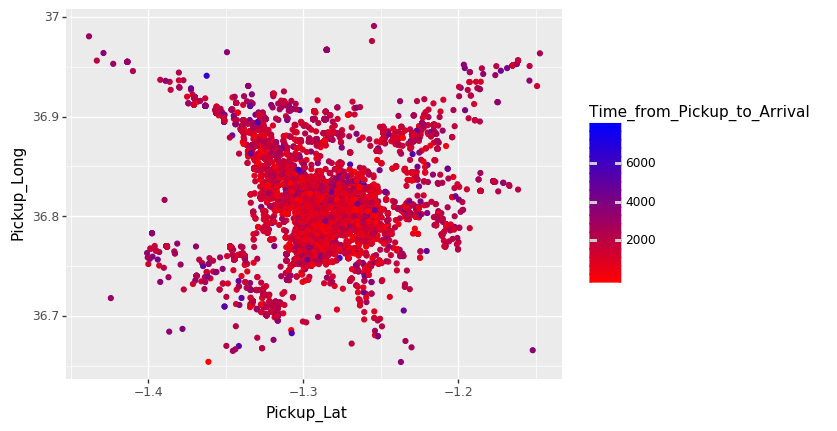

<ggplot: (-9223371935662033424)>

In [100]:
ggplot(aes(x='Pickup_Lat', y='Pickup_Long', color= 'Time_from_Pickup_to_Arrival'), data=Train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'blue')

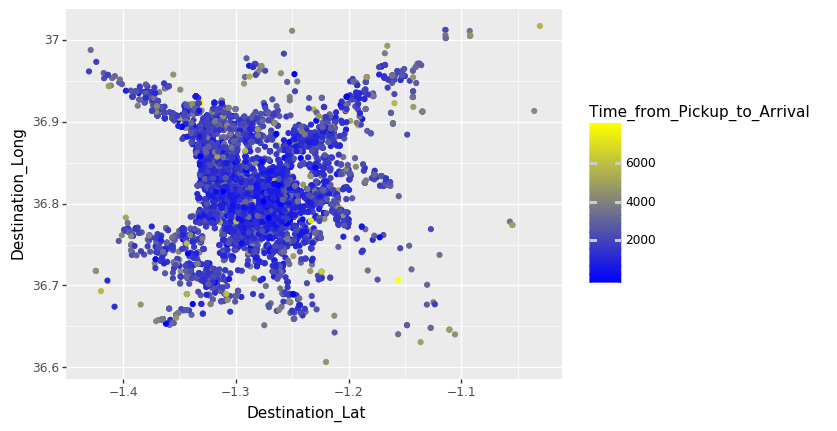

<ggplot: (-9223371935663641964)>

In [101]:
ggplot(aes(x='Destination_Lat', y='Destination_Long', color= 'Time_from_Pickup_to_Arrival'), data=Train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'blue', high = 'yellow')


### Observation

The distance of drop-offs are wider spread than pick up points, many destinations arrival time will be influenced by wider distances. We also notice that lengthy times for deliveries occur in both the central and outlier destinations. Traffic congestion and distance are all influential in the pick to arrival time duration

## Normalising And Scaling Variables

## Checking Coeffcients (Lasso)

## Dropping More Columns

## Outliers

## Feature Engineering Columns

## Feature Interaction

## Feature Selection

## Training Data on Different Models

## MSE Of Models

__more detailed look at what data is actually missing:__

In [10]:
ts_total = Test_df.isnull().sum().sort_values(ascending=False)
ts_percent_1 = Test_df.isnull().sum()/Test_df.isnull().count()*100
ts_percent_2 = (round(ts_percent_1, 1)).sort_values(ascending=False)
ts_missing_data = pd.concat([ts_total, ts_percent_2], axis=1, keys=['Total', '%'])
ts_missing_data.head(5)

,Total,%
Precipitation in millimeters,6869,97.2
Temperature,1437,20.3
Rider Id,0,0.0
Confirmation - Time,0,0.0
User Id,0,0.0


the missing data is pretty much similar the thr train set .

In [11]:
# Rider data set
Riders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


There are 960 entries and 5 features. features consist of  a float, 3 int and 1 object.

In [12]:
Riders_df.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


__more detailed look at what data is actually missing:__

In [13]:
r_total = Riders_df.isnull().sum().sort_values(ascending=False)
r_percent_1 = Riders_df.isnull().sum()/Riders_df.isnull().count()*100
r_percent_2 = (round(r_percent_1, 1)).sort_values(ascending=False)
r_missing_data = pd.concat([r_total, r_percent_2], axis=1, keys=['Total', '%'])
r_missing_data.head(5)

,Total,%
No_of_Ratings,0,0.0
Average_Rating,0,0.0
Age,0,0.0
No_Of_Orders,0,0.0
Rider Id,0,0.0


there are no missing values in the riders data set.

In [14]:
# VariableDefinition data set
VariableDefinitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Order No                             34 non-null     object
 1   Unique number identifying the order  33 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


This data set has the descriptive details about all the features which are in the Train,Test and Rides data set.

In [15]:
VariableDefinitions_df.head(8)

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31


In [16]:
SampleSubmission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order_No                     7068 non-null   object 
 1   Time from Pickup to Arrival  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 110.6+ KB


In [17]:
SampleSubmission_df.head(8)

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN
5,Order_No_14573,NaN
6,Order_No_6731,NaN
7,Order_No_18436,NaN


##

dropping unecesarry column and adding of missing values

In [ ]:
## Lasso

In [95]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [96]:
## Importing datasets
Train_df= pd.read_csv("Data\Train.csv")
Test_df= pd.read_csv("Data\Test.csv")
Riders_df= pd.read_csv("Data\Riders.csv")
VariableDefinitions_df= pd.read_csv("Data\VariableDefinitions.csv")
SampleSubmission_df= pd.read_csv("Data\SampleSubmission.csv")

In [97]:
Train_df = pd.merge(Train_df, Riders_df, left_on='Rider Id', right_on='Rider Id', how='left')
Test_df = pd.merge(Test_df, Riders_df, left_on='Rider Id', right_on='Rider Id', how='left')

In [98]:
#Test_df.info()

In [99]:
#Train_df.info()

In [100]:
Train_df = Train_df.drop(['Order No','User Id','No_Of_Orders','Vehicle Type','Rider Id'], axis=1)
#Test_df = Test_df.drop(['Order No','User Id','No_Of_Orders','Vehicle Type','Rider Id'], axis=1)

In [101]:
#Train_df.info()

In [102]:
## Dummy variables
def encode_dummy(df, column_name):
    df[column_name] =  pd.get_dummies(df[column_name],drop_first = True)
    return df


In [103]:
## Take care of missing data
def impute_mean(df, column_name):
    df[column_name] = df[column_name].fillna(df[column_name].mean())
    return df

In [104]:
## Alter time
def alter_time(df):
    time_matrix = ['Placement - Time','Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time','Arrival at Destination - Time']

    for i in time_matrix:
        df[i] = pd.to_datetime(df[i]).dt.strftime('%H:%M:%S')
        df[i] = pd.to_timedelta(df[i])
        df[i] = df[i].dt.total_seconds()
    return df

In [105]:
## Prepare dataset
'''X_train = Train_df.drop('Time from Pickup to Arrival', axis=1)
Y_train = Train_df['Time from Pickup to Arrival']
X_test = Test_df.drop('Time from Pickup to Arrival', axis=1)
Y_test = Test_df['Time from Pickup to Arrival']
'''

"X_train = Train_df.drop('Time from Pickup to Arrival', axis=1)\nY_train = Train_df['Time from Pickup to Arrival']\nX_test = Test_df.drop('Time from Pickup to Arrival', axis=1)\nY_test = Test_df['Time from Pickup to Arrival']\n"

In [106]:
# Temp Dataset
X_train, X_test, Y_train, Y_test = train_test_split(Train_df, 
                                                    Train_df['Time from Pickup to Arrival'], 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [107]:
Y_train

0         745
1        1993
2         455
3        1341
4        1214
         ... 
16955    4703
16956    1062
16957    4119
16958    1054
16959    2039
Name: Time from Pickup to Arrival, Length: 16960, dtype: int64

In [108]:
#Scale Dataset
def scale_data(data):
    scaled_features = StandardScaler().fit_transform(data.values)
    return scaled_features

In [109]:
X_train = scale_data(alter_time(encode_dummy(impute_mean(impute_mean(X_train, 'Temperature'), 'Precipitation in millimeters'), 'Personal or Business')))
#Y_train = scale_data(alter_time(encode_dummy(impute_mean(impute_mean(Y_train, 'Temperature'), 'Precipitation in millimeters'), 'Personal or Business')))
X_test = scale_data(alter_time(encode_dummy(impute_mean(impute_mean(X_test, 'Temperature'), 'Precipitation in millimeters'), 'Personal or Business')))
#Y_test = scale_data(alter_time(encode_dummy(impute_mean(impute_mean(Y_test, 'Temperature'), 'Precipitation in millimeters'), 'Personal or Business')))
Y_train = Y_train.values
Y_test = Y_test.values


C:\Users\Smanga\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Smanga\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Smanga\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithC

In [110]:
X_train.shape

(16960, 28)

In [111]:
# import LASSO module
from sklearn.linear_model import Lasso

In [112]:
# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [114]:
# train the LASSO model
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
# extract intercept from model
intercept = float(lasso.intercept_)

In [116]:
# extract intercept
print("Intercept:", float(intercept))

Intercept: 1560.7420400943397


In [119]:
coeff = pd.DataFrame(lasso.coef_, Train_df.columns, columns=['Coefficient'])

In [120]:
coeff

,Coefficient
Platform Type,-0.000000
Personal or Business,0.063669
Placement - Day of Month,-0.000000
Placement - Weekday (Mo = 1),0.000000
Placement - Time,7.442416
Confirmation - Day of Month,-0.000000
Confirmation - Weekday (Mo = 1),0.000000
Confirmation - Time,0.812037
Arrival at Pickup - Day of Month,-0.000000
Arrival at Pickup - Weekday (Mo = 1),0.000000
